# Evaluation of Hamming Distances

Before, I used some C code and the [pHash library](https://phash.org/) to calculate *perceptual hashes* for all images. I used the same library for calculating hamming distances between all the pictures (resulting in a massive 90,000 x 90,000 matrix). Now, I want to explore how useful these hashes were for the given task.

In [1]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os.path

In [2]:
imagenames = pd.read_csv("data/pHashApproach/pHashImage.csv", header=None, usecols=[0], sep=" ")

In [3]:
def remove_prefix_from_number(prefixed_number: str) -> int:
    return int(prefixed_number[1:])

In [4]:
def read_hamming_distances(filename):
    return pd.read_csv(filename, header=None, sep=" ", 
                       converters={0:remove_prefix_from_number, 1:remove_prefix_from_number})

## Reading in data

First step is of course to read in the existing data from disk.
At the end we have some pandas DataFrame objects with a numeric index and two columns with the image IDs (which are the same as the index from the `imagenames` DataFrame.

In [5]:
distance00 = read_hamming_distances("data/pHashApproach/hamming_distance_00.csv")
distance01 = read_hamming_distances("data/pHashApproach/hamming_distance_01.csv")
distance02 = read_hamming_distances("data/pHashApproach/hamming_distance_02.csv")
distance03 = read_hamming_distances("data/pHashApproach/hamming_distance_03.csv")
distance04 = read_hamming_distances("data/pHashApproach/hamming_distance_04.csv")
distance05 = read_hamming_distances("data/pHashApproach/hamming_distance_05.csv")
distance06 = read_hamming_distances("data/pHashApproach/hamming_distance_06.csv")
distance07 = read_hamming_distances("data/pHashApproach/hamming_distance_07.csv")
distance08 = read_hamming_distances("data/pHashApproach/hamming_distance_08.csv")
distance09 = read_hamming_distances("data/pHashApproach/hamming_distance_09.csv")

In [6]:
def indexes_to_filenames(index_df, imagenames_df):
    removed_symmetric_duplicates = frozenset(index_df.apply(frozenset, axis=1))
    set_to_tuple = map(tuple, removed_symmetric_duplicates)
    return [(imagenames_df[0][id1], imagenames_df[0][id2]) for id1, id2 in set_to_tuple]

## Let's go through the data
Comparing the results from all the data files one after each other.

In [7]:
def diplay_image_tuple(imagename1, imagename2):
    image1 = Image.open(os.path.join("data", imagename1))
    image2 = Image.open(os.path.join("data", imagename2))
    image1.thumbnail([400, 400])
    image2.thumbnail([400, 400])
    display(image1)
    display(image2)

In [8]:
def show_all_image_pairs(list_of_filenames):
    for i, (img1, img2) in enumerate(list_of_filenames):
        print("list entry", i)
        diplay_image_tuple(img1, img2)

### Images with distance 0
Most images with distance 0 are the same do we can filter out most of them where the ID is identical.

In [9]:
distance00_filenames = indexes_to_filenames(distance00[distance00[0] != distance00[1]], imagenames)
len(distance00_filenames)

3

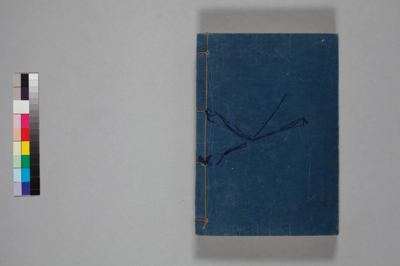

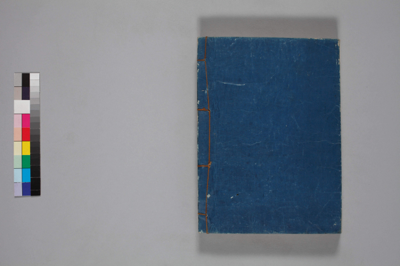

In [10]:
diplay_image_tuple(*distance00_filenames[0])

Result: Distance 0 is useless. It only detects identical pictures and a few book covers.

### Images with distance 1

In [11]:
distance01_filenames = indexes_to_filenames(distance01, imagenames)
len(distance01_filenames)

1

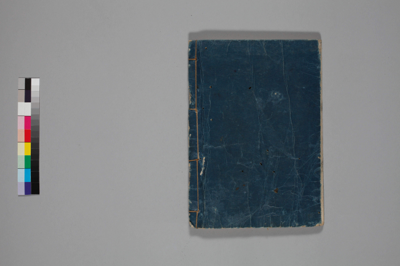

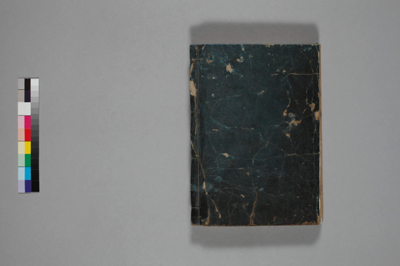

In [12]:
diplay_image_tuple(*distance01_filenames[0])

Same `:(`

### Images with distance 2

In [13]:
distance02_filenames = indexes_to_filenames(distance02, imagenames)
len(distance02_filenames)

96

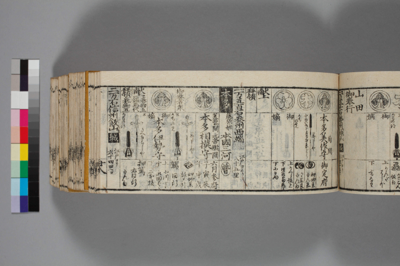

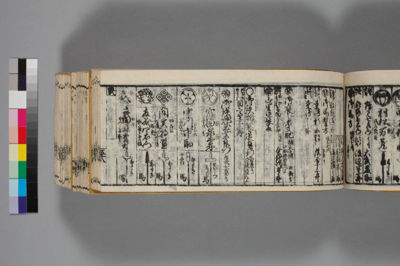

In [14]:
diplay_image_tuple(*distance02_filenames[49])

Result: Most of the images are covers, again. There are some pages but they don't resemble each other at all.

### Images with distance 3

In [15]:
distance03_filenames = indexes_to_filenames(distance03, imagenames)
len(distance03_filenames)

17

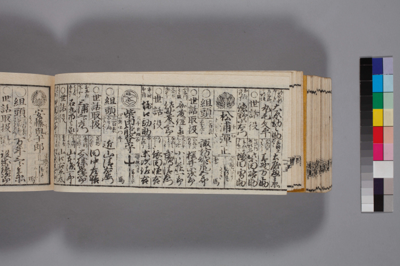

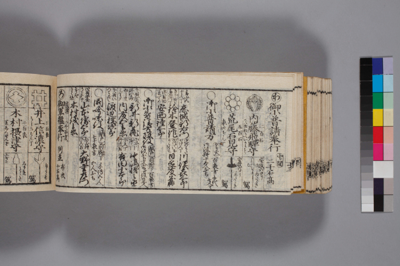

In [16]:
diplay_image_tuple(*distance03_filenames[15])

Same.

### Images with distance 4

In [17]:
distance04_filenames = indexes_to_filenames(distance04, imagenames)
len(distance04_filenames)

635

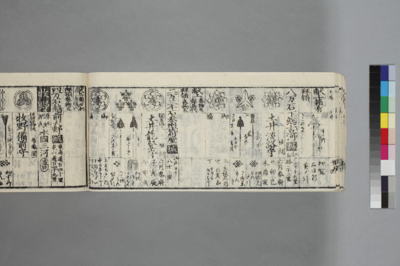

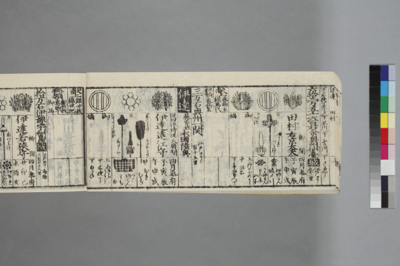

In [18]:
diplay_image_tuple(*distance04_filenames[43])

Same.

## Conclusion

Perceptual hashes in their default implementation do not work very well here. I suspect they were mainly developed for photos and similar images with many details. Even for humans, textual documents can seem extremely similar when just skipping through the pages and not looking at the content.

Possibly, one can apply this algorithm to these documents after some modifications. For later, it might be useful to look more detailed into the workings of perceptual hashes.